In [2]:
import pandas as pd

seed_path = '../../data/xdpole/curriculumstats/s10_run.csv'

df = pd.read_csv(seed_path)

In [3]:
import plotly.graph_objects as go

fg = go.Figure(
    layout=go.Layout(title='Specialist Score X Generation')
)

fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.specialist_score,
            mode='lines',
            name='Raw'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.specialist_score.rolling(80).mean(),
            mode='lines',
            name='Rolling Mean 80'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.specialist_score.rolling(160).mean(),
            mode='lines',
            name='Rolling Mean 160'
        ),
    )
)

fg.update_xaxes(title_text='Generation')
fg.update_yaxes(title_text='Score')
fg.show()

In [4]:
score_cycle = len(df.query('specialist_cycle == "score"'))
predict_cycle = len(df.query('specialist_score >= 0.7'))
fit_cycle = len(df.query('specialist_cycle == "fit"'))

fg = go.Figure(
    [go.Bar(
        x=['fit', 'score', 'predict'], y=[fit_cycle, score_cycle, predict_cycle]
    )],
    layout=go.Layout(title='Score, Fit, Predict Cycles')
)
fg.update_yaxes(title_text='Generations')
fg.update_xaxes(title_text='Cycle')
fg.show()

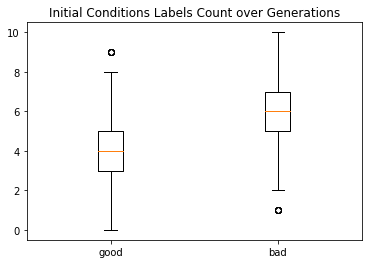

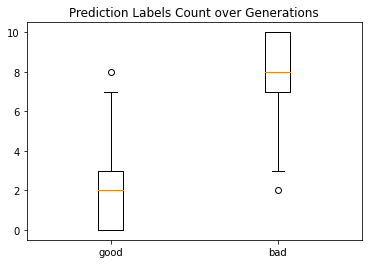

In [24]:
from matplotlib import pyplot as plt

initial_conditions_good_proportion = df['initial_conditions_proportion'].dropna()
initial_conditions_bad_proportion = [10 - c for c in df['initial_conditions_proportion'].dropna()]

plt.boxplot([initial_conditions_good_proportion, initial_conditions_bad_proportion])
plt.xticks([1, 2], ['good', 'bad'])
plt.title('Initial Conditions Labels Count over Generations')
plt.show()

prediction_good_proportion = df['prediction_proportion'].dropna()
prediction_bad_proportion = [10 - c for c in df['prediction_proportion'].dropna()]

plt.boxplot([prediction_good_proportion, prediction_bad_proportion])
plt.xticks([1, 2], ['good', 'bad'])
plt.title('Prediction Labels Count over Generations')
plt.show()


In [33]:
fg = go.Figure(
    layout=go.Layout(title='Good Conditions X Time')
)

fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.initial_conditions_proportion.rolling(10).mean(),
            mode='lines',
            name='Initial Conditions Good Labels',
            marker_color='blue'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.prediction_proportion.rolling(10).mean(),
            mode='lines',
            name='Prediction Good Labels',
            marker_color='purple'
        ),
    )
)

fg.update_xaxes(title_text='Generation')
fg.update_yaxes(title_text='Number of Labels')
fg.show()